In [7]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [8]:
data = pd.read_csv("evaluations.csv")
print(len(data.columns))
plot_cols = data.columns[4:]
print(len(plot_cols))

target = data["winner"] == "White"
features = data[list(data.columns)[4:]]


40
36


In [9]:
# fig, axs = plt.subplots(9, 4, figsize=(40, 50))

# for i in range(len(plot_cols)):
#     sns.distplot(data[plot_cols[i]], ax=axs.flat[i])

In [10]:

# features_light_cols = []
# for col in list(data.columns):
#     if col[0] == "D":
#         features_light_cols.append(col)
# features_light = data[features_light_cols]
# print(features_light.columns)
# features = features_light

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

#scaling features
features_transformed = scaler.fit_transform(features)
features_transformed = pd.DataFrame(features_transformed, columns=features.columns)
features_transformed

,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,W_not all pawns,W_pinned evaluation,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
0,1.097770,-1.247363,1.005728,-0.579638,-0.358850,-0.365911,0.097393,1.105927,-2.020177,-0.21021,...,-1.001475,-1.080886,1.056594,0.344069,-0.097393,-1.112700,1.986540,0.215992,0.077838,-0.636715
1,1.097770,-1.247363,1.075740,-0.579638,1.667772,-0.365911,0.454459,1.105927,-2.020177,-0.21021,...,-1.044858,-1.080886,0.510995,0.344069,-0.454459,-1.112700,1.986540,0.215992,-0.227862,-0.636715
2,0.822640,-1.247363,0.762849,-0.579638,1.667772,-0.365911,0.365192,1.105927,-2.020177,-0.21021,...,-1.075226,-2.852765,-0.034604,0.344069,-0.365192,-1.112700,1.986540,0.215992,-0.227862,-0.636715
3,0.822640,-1.247363,0.793101,-0.579638,1.667772,-0.365911,0.097393,1.105927,-2.020177,-0.21021,...,-0.739442,-1.080886,-0.580204,-2.652272,-0.097393,0.898715,1.986540,0.215992,-0.533561,-0.636715
4,-0.002753,0.083158,-0.049630,-0.579638,1.161117,-0.365911,0.275926,1.105927,-2.020177,-0.21021,...,-0.652676,-1.080886,-1.125803,-2.652272,-0.275926,0.898715,-0.503388,0.215992,-3.590560,-0.636715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16219,-1.194986,0.083158,-1.216488,-0.579638,-0.865505,-0.365911,-0.795271,-0.904219,0.495006,-0.21021,...,1.257043,0.690994,0.510995,0.344069,0.795271,0.898715,-0.503388,0.215992,0.383538,1.567738
16220,1.097770,-1.247363,1.023879,-0.579638,0.147806,-0.365911,0.097393,1.105927,-2.020177,-0.21021,...,-1.042255,0.690994,-0.034604,0.344069,-0.097393,-1.112700,1.986540,0.215992,0.689238,-0.636715
16221,1.006060,0.083158,1.040302,-0.579638,0.654461,-0.365911,0.632992,1.105927,0.495006,-0.21021,...,-1.029240,0.690994,-1.125803,0.344069,-0.632992,-1.112700,-0.503388,0.215992,-0.227862,-0.636715
16222,0.455798,0.083158,0.468109,1.273741,0.654461,-0.365911,0.186659,-0.904219,0.495006,-0.21021,...,-0.405393,0.690994,-1.125803,0.344069,-0.186659,0.898715,-0.503388,0.215992,0.383538,-0.636715


In [12]:
# fig, axs = plt.subplots(9, 4, figsize=(40, 50))

# for i in range(len(plot_cols)):
#     sns.distplot(features_transformed[plot_cols[i]], ax=axs.flat[i])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.15, random_state=0)

In [14]:
# all parameters not specified are set to their defaults
classifiers = [
    LogisticRegression(solver="lbfgs"),
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]
#     QuadraticDiscriminantAnalysis()]

names = ["LogReg", "Nearest Neighbors",
#          "Linear SVM", "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

kfold = KFold(n_splits=10, random_state=3000, shuffle=True)
for i in range(len(classifiers)):
    
    c = classifiers[i]
#     c.fit(x_train, y_train)
#     score = c.score(x_test, y_test)
#     print(names[i], score)
    
        # get the cv score and print it 
    scores = cross_val_score(estimator=c, X=x_train, y=y_train, cv=kfold)
    print(names[i], scores.mean())
#     print(names[i] + ": \n\t" + f'Mean r-squared = {scores.mean()}, ' + f'standard deviation = {scores.std():.2%}' +"\n")
    
    
    

LogReg 0.6467005076142132
Nearest Neighbors 0.7005801305293691
Gaussian Process 0.6729514140681653
Decision Tree 0.6307469180565628
Random Forest 0.6856417693981147
Neural Net 0.6715736040609137
AdaBoost 0.6265409717186368


In [ ]:
from sklearn.model_selection import GridSearchCV

#parameters we will tune
estimator_params = {"Linear Regression": {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}, 
              "Ridge": {'alpha':[1.5, 1.6, 1.7, 1.8, 1.9, 2]},
              "k-Nearest Neighbor": {'n_neighbors': [12, 13, 14, 15, 16, 17, 18]},
              "Support Vector Machine": {'C':[5, 6, 7, 8, 9, 10, 11]}}

def grid_search(estimators,params):
    for e in estimators: 
        print(e)
        model = estimators[e]

        #executing grid search with model
        param = estimator_params[e]
        grid_search= GridSearchCV(model,param,cv=5)

        #testing performance of the grid search 
        grid_search.fit(X=X_train, y=y_train)

        print('\tBest parameters:', grid_search.best_params_)
        print('\tBest cross-validation score:', grid_search.best_score_)
        print('\tTest set score:',grid_search.score(X_test,y_test))

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = DecisionTreeClassifier(max_depth=5)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(x_train, y_train)
selector.support_


# selector.ranking_


In [ ]:
# rank = selector.ranking_
# features_cols = features.columns
# rank_dict = {}

# for i in range(len(rank)):
# #     print(features_cols[i])
#     rank_dict[rank[i] ] = features_cols[i]
    
# print(sorted(rank_dict))
# for rank,val in rank_dict.items():
#     print(rank, val)
# print(rank_dict)
# # print(sorted(rank_dict))



new_features = []
support = selector.support_
for i in range(len(features.columns)):
    if support[i]:
        new_features.append(features.columns[i])
        
        

features_transformed = features_transformed[new_features]

x_train, x_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.15, random_state=0)

# print(features.columns)

In [ ]:



# all parameters not specified are set to their defaults
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

names = ["LogReg","Nearest Neighbors",
#          "Linear SVM", "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

for i in range(len(classifiers)):
    
    c = classifiers[i]
    c.fit(x_train, y_train)
    score = c.score(x_test, y_test)
    print(names[i], score)

40
36


ValueError: query data dimension must match training data dimension

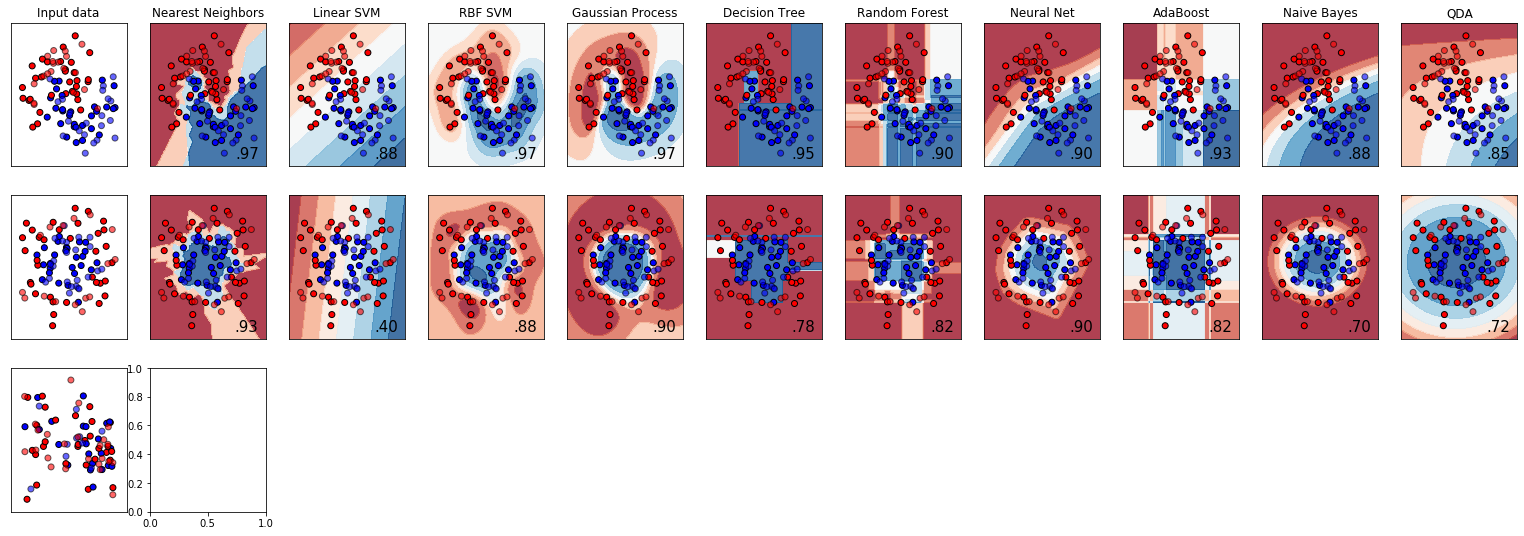

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


data = pd.read_csv("evaluations.csv")
data  = data.sample(100)
print(len(data.columns))
plot_cols = data.columns[4:]
print(len(plot_cols))

target = data["winner"] == "White"
features = data[list(data.columns)[4:]]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=0)

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = x_train, y_train

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()